# N400 mean analysis
### Time window: 300 - 500 ms


## Load necessary libraries
If any of these don't load, you'll need to install them. Assuming you installed Jupyter through Anaconda, you would do the following to install a package
`conda install -c r r-[pkgName]`
e.g., to install ggplot2 you would do:
`conda install -c r r-ggplot2`

In [1]:
# R.home()

In [2]:
library(ggplot2)
library(mgcv)
library(parallel)
library(plyr)
library(dplyr)
library(tidyr)
library(data.table)
library(viridis)
library(ggthemes)
library(nlme)

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘mgcv’ was built under R version 4.0.5”
Loading required package: nlme

This is mgcv 1.8-36. For overview type 'help("mgcv-package")'.

Warning message:
“package ‘plyr’ was built under R version 4.0.5”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:nlme’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Warning message:
“package ‘viridis’ was built under R version 4.0.5”
Loading required package: viridisLite



## Set parameters for this analysis

In [3]:
CurTimeWin = '300-500'
component = 'N400'

topdir = getwd()
expt = 'Instagram Influencers'
outdir = (paste(topdir,'/EEG-Results/Stats_Output',sep=''))
dir.create(outdir, showWarnings = FALSE)
# Functions we'll use later
source(paste(topdir,'/NCIL_functions.R',sep=""))

# source(paste(topdir,'/romr.fnc.R',sep=""))


# num parallel processes for bam(). Should be less than the number of threads supported by your CPU
num_cores = 8

options("scipen"=100, "digits"=5)  # force decimal instead of scientific notation

In [4]:
subjects = c(    'ID01',
    'ID02',
    'ID03',
    'ID04',
    'ID05',
    'ID06',
    'ID07',
    'ID08',
    'ID09',
    'ID10',
    'ID11',
    'ID12',
    'ID13',
    'ID14',
    'ID15',
    'ID16',
    'ID17',
    'ID18',
    'ID19',
    'ID20',
    'P00',
    'P01'
            ) 

## Load Data

In [5]:
dat  <- {}
for(s in 1:length(subjects)) {
    infile <- paste(topdir, '/EEG-Results/', subjects[s], '_', component, '_mean_', CurTimeWin, '.csv',sep="")
    print(infile)
    tmpdat <- read.csv(infile) 
    tmpdat$Subj <- as.factor(subjects[s])
    tmplong <- gather(tmpdat, channel, meanAmpl, Fp1:VEOG) 
    tmplong$channel = as.factor(tmplong$channel)
    dat  <- rbind(dat, tmplong)
    }

setwd(topdir)

[1] "/media/NCILscience/Instagram/Analysis with Time Shift/EEG-Results/ID01_N400_mean_300-500.csv"
[1] "/media/NCILscience/Instagram/Analysis with Time Shift/EEG-Results/ID02_N400_mean_300-500.csv"
[1] "/media/NCILscience/Instagram/Analysis with Time Shift/EEG-Results/ID03_N400_mean_300-500.csv"
[1] "/media/NCILscience/Instagram/Analysis with Time Shift/EEG-Results/ID04_N400_mean_300-500.csv"
[1] "/media/NCILscience/Instagram/Analysis with Time Shift/EEG-Results/ID05_N400_mean_300-500.csv"
[1] "/media/NCILscience/Instagram/Analysis with Time Shift/EEG-Results/ID06_N400_mean_300-500.csv"
[1] "/media/NCILscience/Instagram/Analysis with Time Shift/EEG-Results/ID07_N400_mean_300-500.csv"
[1] "/media/NCILscience/Instagram/Analysis with Time Shift/EEG-Results/ID08_N400_mean_300-500.csv"
[1] "/media/NCILscience/Instagram/Analysis with Time Shift/EEG-Results/ID09_N400_mean_300-500.csv"
[1] "/media/NCILscience/Instagram/Analysis with Time Shift/EEG-Results/ID10_N400_mean_300-500.csv"
[1] "/medi

In [6]:
colnames(dat)[1] <- 'epoch'
colnames(dat)[2] <- 'microcondition'

In [7]:
dat$macrocondition = dat$microcondition
head(dat)

,epoch,microcondition,Subj,channel,meanAmpl,macrocondition
,<int>,<chr>,<fct>,<fct>,<dbl>,<chr>
1,1,HI/flaviapava,ID01,Fp1,3.1007,HI/flaviapava
2,2,HI/adhelbol,ID01,Fp1,-14.0113,HI/adhelbol
3,3,VI/iamxalara,ID01,Fp1,3.2273,VI/iamxalara
4,4,VI/shudugram,ID01,Fp1,-6.5335,VI/shudugram
5,5,HI/flaviapava,ID01,Fp1,5.4923,HI/flaviapava
6,6,VI/noonouri,ID01,Fp1,-5.6791,VI/noonouri


In [8]:
dat$macrocondition[dat$macrocondition == 'HI/adhelbol'] <- 'HI'
dat$macrocondition[dat$macrocondition == 'HI/chiaraferragni'] <- 'HI'
dat$macrocondition[dat$macrocondition == 'HI/emilycanham'] <- 'HI'
dat$macrocondition[dat$macrocondition == 'HI/flaviapava'] <- 'HI'
dat$macrocondition[dat$macrocondition == 'HI/imjennim'] <- 'HI'
dat$macrocondition[dat$macrocondition == 'HI/jihye'] <- 'HI'
dat$macrocondition[dat$macrocondition == 'HI/lamise'] <- 'HI'
dat$macrocondition[dat$macrocondition == 'HI/rosesarerosie'] <- 'HI'
dat$macrocondition[dat$macrocondition == 'HI/simoneses'] <- 'HI'
dat$macrocondition[dat$macrocondition == 'HI/sooyaa'] <- 'HI'

dat$macrocondition[dat$macrocondition == 'VI/bermudaisbae'] <- 'VI'
dat$macrocondition[dat$macrocondition == 'VI/iamxalara'] <- 'VI'
dat$macrocondition[dat$macrocondition == 'VI/immagram'] <- 'VI'
dat$macrocondition[dat$macrocondition == 'VI/leyalovenat'] <- 'VI'
dat$macrocondition[dat$macrocondition == 'VI/lilmiquela'] <- 'VI'
dat$macrocondition[dat$macrocondition == 'VI/magazineluiza'] <- 'VI'
dat$macrocondition[dat$macrocondition == 'VI/noonouri'] <- 'VI'
dat$macrocondition[dat$macrocondition == 'VI/rozygram'] <- 'VI'
dat$macrocondition[dat$macrocondition == 'VI/shudugram'] <- 'VI'
dat$macrocondition[dat$macrocondition == 'VI/soymaria'] <- 'VI'

In [9]:
summary(dat)

     epoch      microcondition          Subj          channel     
 Min.   : 1.0   Length:56066       ID01   : 2720   C3     : 1649  
 1st Qu.:20.0   Class :character   ID03   : 2720   C4     : 1649  
 Median :41.0   Mode  :character   ID05   : 2720   CP1    : 1649  
 Mean   :40.5                      ID12   : 2720   CP2    : 1649  
 3rd Qu.:60.0                      ID18   : 2686   CP5    : 1649  
 Max.   :80.0                      ID19   : 2686   CP6    : 1649  
                                   (Other):39814   (Other):46172  
    meanAmpl       macrocondition    
 Min.   :-574.71   Length:56066      
 1st Qu.:  -4.10   Class :character  
 Median :   2.22   Mode  :character  
 Mean   :   2.92                     
 3rd Qu.:   9.25                     
 Max.   : 584.02                     
                                     

In [10]:
# dat

### Assign ROI labels to electrodes we will analyze, then drop remaining electrodes

Let's not use these in the initial analysis. We should keep the working code here just in case.

In [11]:
head(dat$channel)

[1] Fp1 Fp1 Fp1 Fp1 Fp1 Fp1
34 Levels: C3 C4 CP1 CP2 CP5 CP6 Cz F3 F4 F7 F8 FC1 FC2 FC5 FC6 Fp1 Fp2 ... VEOG

In [12]:
dat$ROI = 'NA' # which electrodes WILL we analyze? Should I focus just on the Pz/POz region?

dat$ROI<-rep('0',times=nrow(dat))

Back =  c('Cz','CP1', 'CP2','Pz') 
which(dat$channel%in%Back)->x
dat$ROI[x]<-"Back" 

dat$ROI <- factor(dat$ROI, levels = c("Back"))

# dat = droplevels(dat)
dat <- dat %>% drop_na(ROI)


dat$microcondition <- factor(dat$microcondition)
dat$macrocondition <- factor(dat$macrocondition)

In [13]:
summary(dat)

     epoch              microcondition      Subj         channel    
 Min.   : 1.0   HI/imjennim    : 344   ID01   : 320   CP1    :1649  
 1st Qu.:20.0   HI/jihye       : 344   ID03   : 320   CP2    :1649  
 Median :41.0   VI/iamxalara   : 340   ID05   : 320   Cz     :1649  
 Mean   :40.5   HI/adhelbol    : 336   ID12   : 320   Pz     :1649  
 3rd Qu.:60.0   HI/emilycanham : 336   ID18   : 316   C3     :   0  
 Max.   :80.0   VI/bermudaisbae: 336   ID19   : 316   C4     :   0  
                (Other)        :4560   (Other):4684   (Other):   0  
    meanAmpl      macrocondition   ROI      
 Min.   :-45.64   HI:3316        Back:6596  
 1st Qu.: -2.76   VI:3280                   
 Median :  4.81                             
 Mean   :  5.21                             
 3rd Qu.: 13.07                             
 Max.   : 63.71                             
                                            

In [14]:
#sumscond <- summarise(dat, mean_games = mean(microconditions))
# data <- aggregate(dat$meanAmpl, list(dat$microcondition, dat$Subj, dat$macrocondition), FUN=mean)
# head(data)

In [15]:
#library(dplyr)

In [16]:
dat$channel <- droplevels(dat$channel)

In [17]:
str(dat)

'data.frame':	6596 obs. of  7 variables:
 $ epoch         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ microcondition: Factor w/ 20 levels "HI/adhelbol",..: 4 1 12 19 4 17 17 16 17 1 ...
 $ Subj          : Factor w/ 22 levels "ID01","ID02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ channel       : Factor w/ 4 levels "CP1","CP2","Cz",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ meanAmpl      : num  -7.77 -17.14 -3.02 -4.37 4.81 ...
 $ macrocondition: Factor w/ 2 levels "HI","VI": 1 1 2 2 1 2 2 2 2 1 ...
 $ ROI           : Factor w/ 1 level "Back": 1 1 1 1 1 1 1 1 1 1 ...


In [18]:
summary(dat)

     epoch              microcondition      Subj      channel   
 Min.   : 1.0   HI/imjennim    : 344   ID01   : 320   CP1:1649  
 1st Qu.:20.0   HI/jihye       : 344   ID03   : 320   CP2:1649  
 Median :41.0   VI/iamxalara   : 340   ID05   : 320   Cz :1649  
 Mean   :40.5   HI/adhelbol    : 336   ID12   : 320   Pz :1649  
 3rd Qu.:60.0   HI/emilycanham : 336   ID18   : 316             
 Max.   :80.0   VI/bermudaisbae: 336   ID19   : 316             
                (Other)        :4560   (Other):4684             
    meanAmpl      macrocondition   ROI      
 Min.   :-45.64   HI:3316        Back:6596  
 1st Qu.: -2.76   VI:3280                   
 Median :  4.81                             
 Mean   :  5.21                             
 3rd Qu.: 13.07                             
 Max.   : 63.71                             
                                            

## Okay, we have the EEG data aggregated and prepared for the LPP now - let's now merge in the behavioral data


In [19]:
beh_dat <- read.csv("Behavioral Results/total_behavioral_data_new.csv")

beh_dat$microcondition <- factor(beh_dat$microcondition)
beh_dat$macrocondition <- factor(beh_dat$macrocondition)
beh_dat$Subj <- factor(beh_dat$participant)

summary(beh_dat)

 participant                  microcondition macrocondition     human     
 Length:440         HI/adhelbol      : 22    HI:220         Min.   :1.00  
 Class :character   HI/chiaraferragni: 22    VI:220         1st Qu.:1.00  
 Mode  :character   HI/emilycanham   : 22                   Median :4.00  
                    HI/flaviapava    : 22                   Mean   :3.18  
                    HI/imjennim      : 22                   3rd Qu.:5.00  
                    HI/jihye         : 22                   Max.   :5.00  
                    (Other)          :308                                 
     trust         uncanny         use            Subj    
 Min.   :1.00   Min.   :1.0   Min.   :1.00   ID01   : 20  
 1st Qu.:1.00   1st Qu.:2.0   1st Qu.:1.00   ID02   : 20  
 Median :2.00   Median :3.0   Median :2.00   ID03   : 20  
 Mean   :2.49   Mean   :2.9   Mean   :2.27   ID04   : 20  
 3rd Qu.:3.00   3rd Qu.:4.0   3rd Qu.:3.00   ID05   : 20  
 Max.   :5.00   Max.   :5.0   Max.   :5.00   I

In [20]:
dat <- merge(dat,beh_dat,by=c("macrocondition", "microcondition", "Subj"))

In [21]:
summary(dat)

 macrocondition         microcondition      Subj          epoch      channel   
 HI:3316        HI/imjennim    : 344   ID01   : 320   Min.   : 1.0   CP1:1649  
 VI:3280        HI/jihye       : 344   ID03   : 320   1st Qu.:20.0   CP2:1649  
                VI/iamxalara   : 340   ID05   : 320   Median :41.0   Cz :1649  
                HI/adhelbol    : 336   ID12   : 320   Mean   :40.5   Pz :1649  
                HI/emilycanham : 336   ID18   : 316   3rd Qu.:60.0             
                VI/bermudaisbae: 336   ID19   : 316   Max.   :80.0             
                (Other)        :4560   (Other):4684                            
    meanAmpl        ROI       participant            human          trust     
 Min.   :-45.64   Back:6596   Length:6596        Min.   :1.00   Min.   :1.00  
 1st Qu.: -2.76               Class :character   1st Qu.:1.00   1st Qu.:1.00  
 Median :  4.81               Mode  :character   Median :4.00   Median :2.00  
 Mean   :  5.21                             

In [22]:
dat %>%
count(dat$macrocondition)

dat$macrocondition,n
<fct>,<int>
HI,3316
VI,3280


## Create Random Effects Variables

Create variable coding the condition x Subj random effects. This serves to address any heteroscedasticity (unequal variance) across conditions, and remove uninteresting, subject-specific noise.

In [23]:
dat$ElectrodebySubj = as.factor(paste(as.character(dat$Subj)
                                , as.character(dat$channel),
                                 sep = "_"))


In [24]:
dat$ConditionbySubj = as.factor(paste(as.character(dat$Subj)
                                , as.character(dat$macrocondition),
                                 sep = "_"))

In [25]:
dat$uConditionbySubj = as.factor(paste(as.character(dat$Subj)
                                , as.character(dat$microcondition),
                                 sep = "_"))

## Run initial full model to identify and remove outliers

Now run the model

In [26]:
m0 <- bam(meanAmpl ~ macrocondition 
          + s(Subj, bs="re"),
          data = dat, 
          samfrac=0.1)

In [27]:
dat <- romr.fnc(m0, dat, trim=2.5)$data

m1 <- bam(meanAmpl ~ macrocondition
          + s(Subj, bs="re"),
          data = dat, 
          samfrac=0.1)

n.removed = 135 
percent.removed = 2.0467 


#### Find and remove outliers, then update model


Method: fREML   Optimizer: perf newton
full convergence after 9 iterations.
Gradient range [-0.00000090576,0.00000087449]
(score 25049 & scale 114.76).
Hessian positive definite, eigenvalue range [10.228,3297].
Model rank =  24 / 24 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

          k'  edf k-index p-value
s(Subj) 22.0 20.8      NA      NA


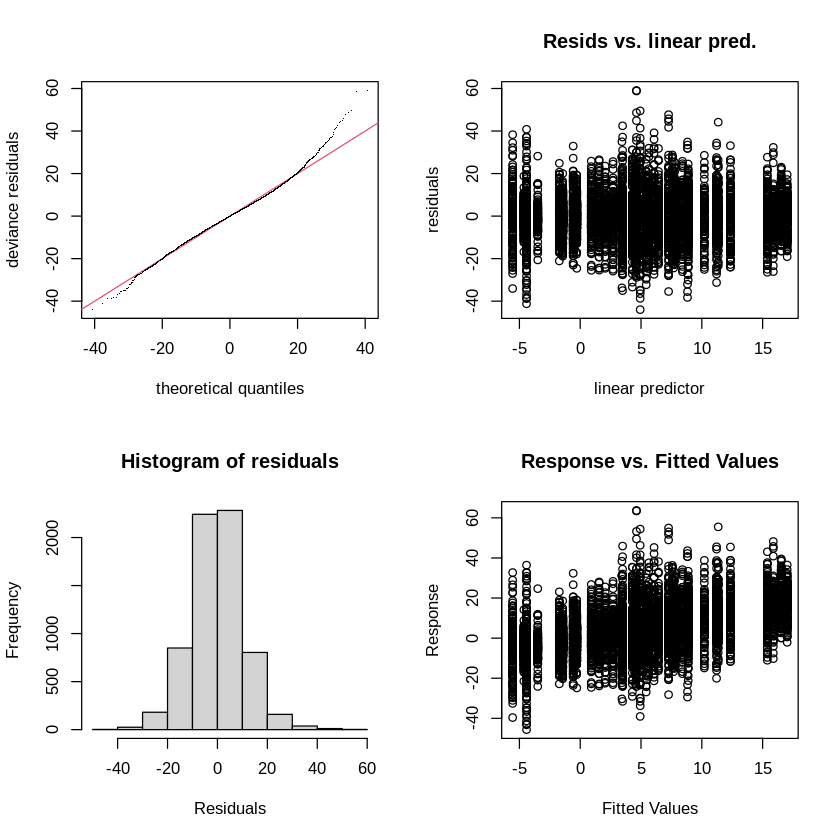

In [28]:
gam.check(m0)


Method: fREML   Optimizer: perf newton
full convergence after 9 iterations.
Gradient range [-0.0000062222,0.0000060426]
(score 23887 & scale 93.786).
Hessian positive definite, eigenvalue range [10.266,3229.5].
Model rank =  24 / 24 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

          k'  edf k-index p-value
s(Subj) 22.0 20.8      NA      NA


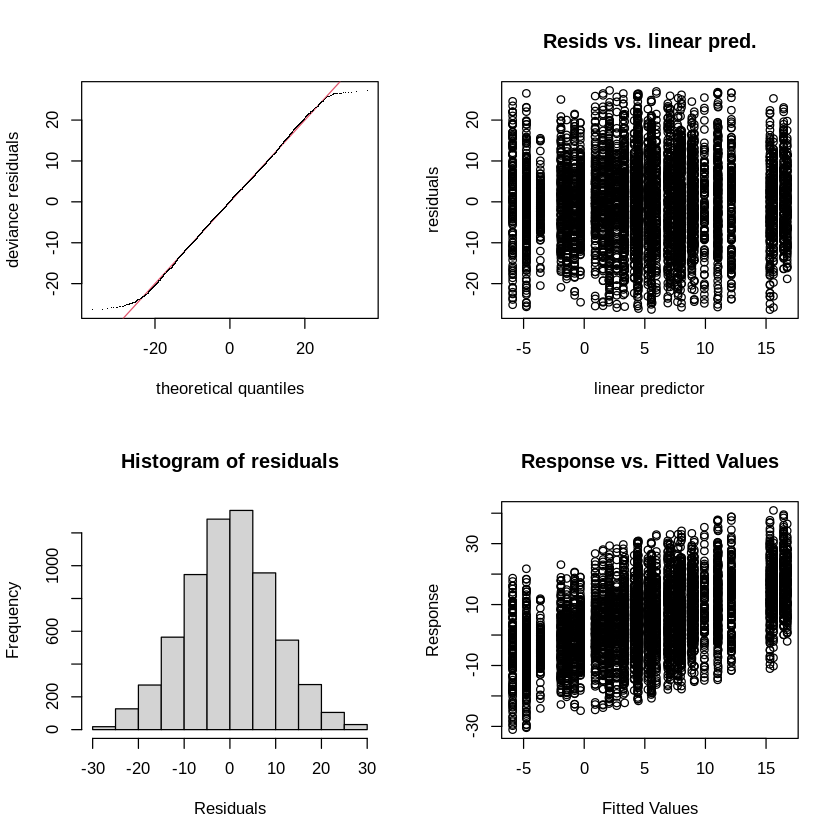

In [29]:
gam.check(m1)

## Compute cell means and CIs, and plot

Comment out:
                          levels = c("HI/adhelbol", "HI/chiaraferragni", "HI/emilycanham", "HI/flaviapava","HI/imjennim", "HI/jihye", "HI/lamise", 
                                     "HI/rosesarerosie", "HI/simoneses", "HI/sooyaa", "VI/bermudaisbae", "VI/iamxalara", "VI/immagram", "VI/leyalovenat", 
                                     "VI/lilmiquela", "VI/magazineluiza", "VI/noonouri", "VI/rozygram", "VI/shudugram", "VI/soymaria")
                      

# Effects Analysis
We will relevel the data around the human condition.

In [30]:
dat$macrocondition <- relevel(dat$macrocondition, 'HI')

In [31]:
cl <- makeCluster(num_cores)

mod <- bam(meanAmpl ~ macrocondition
           + s(Subj, bs="re") 
           + s(ElectrodebySubj, bs="re") 
           + s(ConditionbySubj, bs="re"),
          data = dat, 
          samfrac=0.1, cluster=cl, gc.level=2)

stopCluster(cl)

In [32]:
summary(mod)


Family: gaussian 
Link function: identity 

Formula:
meanAmpl ~ macrocondition + s(Subj, bs = "re") + s(ElectrodebySubj, 
    bs = "re") + s(ConditionbySubj, bs = "re")

Parametric coefficients:
                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)         5.575      1.246    4.48 0.0000078 ***
macroconditionVI   -1.116      0.337   -3.31   0.00094 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                    edf Ref.df      F             p-value    
s(Subj)            19.6     21 710.67 <0.0000000000000002 ***
s(ElectrodebySubj) 56.2     87   9.77               0.056 .  
s(ConditionbySubj) 11.0     42   1.04               0.142    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.294   Deviance explained = 30.3%
fREML =  23782  Scale est. = 88.878    n = 6461

In [33]:
cl <- makeCluster(num_cores)

mod2 <- bam(meanAmpl ~ macrocondition
           + s(Subj, bs="re") 
           + s(ElectrodebySubj, bs="re") 
           + s(uConditionbySubj, bs="re"),
          data = dat, 
          samfrac=0.1, cluster=cl, gc.level=2)

stopCluster(cl)

In [36]:
summary(mod2)


Family: gaussian 
Link function: identity 

Formula:
meanAmpl ~ macrocondition + s(Subj, bs = "re") + s(ElectrodebySubj, 
    bs = "re") + s(uConditionbySubj, bs = "re")

Parametric coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.563      1.265    4.40 0.000011 ***
macroconditionVI   -1.130      0.459   -2.46    0.014 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                      edf Ref.df       F             p-value    
s(Subj)              19.3     21 1353.40 <0.0000000000000002 ***
s(ElectrodebySubj)   58.5     87   15.08               0.093 .  
s(uConditionbySubj) 326.0    438    4.01 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.425   Deviance explained = 46.1%
fREML =  23437  Scale est. = 72.313    n = 6461

In [34]:
cl <- makeCluster(num_cores)

mod3 <- bam(meanAmpl ~ macrocondition
           + s(Subj, bs="re") 
           + s(ElectrodebySubj, bs="re") 
           + s(microcondition, bs="re"),
          data = dat, 
          samfrac=0.1, cluster=cl, gc.level=2)

stopCluster(cl)

In [37]:
summary(mod3)


Family: gaussian 
Link function: identity 

Formula:
meanAmpl ~ macrocondition + s(Subj, bs = "re") + s(ElectrodebySubj, 
    bs = "re") + s(microcondition, bs = "re")

Parametric coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.590      1.325    4.22 0.000025 ***
macroconditionVI   -1.163      0.711   -1.64      0.1    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                    edf Ref.df      F             p-value    
s(Subj)            19.8     21 642.80 <0.0000000000000002 ***
s(ElectrodebySubj) 56.5     87  10.20               0.059 .  
s(microcondition)  16.1     18   9.32 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.308   Deviance explained = 31.8%
fREML =  23731  Scale est. = 87.123    n = 6461

In [35]:
AIC(mod, mod2, mod3)

,df,AIC
,<dbl>,<dbl>
mod,91.187,47421
mod2,407.531,46391
mod3,95.945,47296


---
## Add behavioural ratings to model

In [38]:
str(dat)

'data.frame':	6461 obs. of  16 variables:
 $ macrocondition  : Factor w/ 2 levels "HI","VI": 1 1 1 1 1 1 1 1 1 1 ...
 $ microcondition  : Factor w/ 20 levels "HI/adhelbol",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Subj            : Factor w/ 22 levels "ID01","ID02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ epoch           : int  10 10 22 2 2 22 37 22 37 37 ...
 $ channel         : Factor w/ 4 levels "CP1","CP2","Cz",..: 3 2 3 1 4 2 3 4 1 2 ...
 $ meanAmpl        : num  -0.972 5.431 8.005 -14.695 -8.732 ...
 $ ROI             : Factor w/ 1 level "Back": 1 1 1 1 1 1 1 1 1 1 ...
 $ participant     : chr  "ID01" "ID01" "ID01" "ID01" ...
 $ human           : int  3 3 3 3 3 3 3 3 3 3 ...
 $ trust           : int  2 2 2 2 2 2 2 2 2 2 ...
 $ uncanny         : int  2 2 2 2 2 2 2 2 2 2 ...
 $ use             : int  4 4 4 4 4 4 4 4 4 4 ...
 $ ElectrodebySubj : Factor w/ 88 levels "ID01_CP1","ID01_CP2",..: 3 2 3 1 4 2 3 4 1 2 ...
 $ ConditionbySubj : Factor w/ 44 levels "ID01_HI","ID01_VI",..: 1 1 1 1 1 1 1 1 1 1 ...
 

### Humanness

In [39]:
cl <- makeCluster(num_cores)

mod_h <- bam(meanAmpl ~ human
           + s(Subj, bs="re") 
           + s(ElectrodebySubj, bs="re") 
           + s(uConditionbySubj, bs="re"),
          data = dat, 
          samfrac=0.1, cluster=cl, gc.level=2)

stopCluster(cl)

In [40]:
summary(mod_h)


Family: gaussian 
Link function: identity 

Formula:
meanAmpl ~ human + s(Subj, bs = "re") + s(ElectrodebySubj, bs = "re") + 
    s(uConditionbySubj, bs = "re")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    3.920      1.337    2.93   0.0034 **
human          0.339      0.147    2.30   0.0214 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                      edf Ref.df      F             p-value    
s(Subj)              19.3     21 1362.4 <0.0000000000000002 ***
s(ElectrodebySubj)   58.5     87   14.7               0.094 .  
s(uConditionbySubj) 326.2    438    4.0 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.425   Deviance explained = 46.1%
fREML =  23438  Scale est. = 72.311    n = 6461

### Perceived Trust

In [41]:
cl <- makeCluster(num_cores)

mod_t <- bam(meanAmpl ~ trust
           + s(Subj, bs="re") 
           + s(ElectrodebySubj, bs="re") 
           + s(uConditionbySubj, bs="re"),
          data = dat, 
          samfrac=0.1, cluster=cl, gc.level=2)

stopCluster(cl)

In [42]:
summary(mod_t)


Family: gaussian 
Link function: identity 

Formula:
meanAmpl ~ trust + s(Subj, bs = "re") + s(ElectrodebySubj, bs = "re") + 
    s(uConditionbySubj, bs = "re")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    4.383      1.344    3.26   0.0011 **
trust          0.248      0.196    1.26   0.2077   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                      edf Ref.df       F             p-value    
s(Subj)              19.3     21 1348.40 <0.0000000000000002 ***
s(ElectrodebySubj)   58.5     87   14.54               0.096 .  
s(uConditionbySubj) 327.0    438    4.05 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.425   Deviance explained = 46.1%
fREML =  23440  Scale est. = 72.313    n = 6461

In [43]:
summary(mod_t, test = adjusted('holm'))


Family: gaussian 
Link function: identity 

Formula:
meanAmpl ~ trust + s(Subj, bs = "re") + s(ElectrodebySubj, bs = "re") + 
    s(uConditionbySubj, bs = "re")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    4.383      1.344    3.26   0.0011 **
trust          0.248      0.196    1.26   0.2077   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                      edf Ref.df       F             p-value    
s(Subj)              19.3     21 1348.40 <0.0000000000000002 ***
s(ElectrodebySubj)   58.5     87   14.54               0.096 .  
s(uConditionbySubj) 327.0    438    4.05 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.425   Deviance explained = 46.1%
fREML =  23440  Scale est. = 72.313    n = 6461

### Perceived Uncanniness

In [44]:
cl <- makeCluster(num_cores)

mod_unc <- bam(meanAmpl ~ uncanny
           + s(Subj, bs="re") 
           + s(ElectrodebySubj, bs="re") 
           + s(uConditionbySubj, bs="re"),
          data = dat, 
          samfrac=0.1, cluster=cl, gc.level=2)

stopCluster(cl)

In [45]:
summary(mod_unc)


Family: gaussian 
Link function: identity 

Formula:
meanAmpl ~ uncanny + s(Subj, bs = "re") + s(ElectrodebySubj, 
    bs = "re") + s(uConditionbySubj, bs = "re")

Parametric coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)    5.965      1.332    4.48 0.0000076 ***
uncanny       -0.334      0.163   -2.05      0.04 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                      edf Ref.df       F             p-value    
s(Subj)              19.3     21 1359.19 <0.0000000000000002 ***
s(ElectrodebySubj)   58.5     87   15.05               0.079 .  
s(uConditionbySubj) 326.4    438    4.05 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.425   Deviance explained = 46.1%
fREML =  23439  Scale est. = 72.313    n = 6461

### Intention to Follow Recommendations

In [46]:
cl <- makeCluster(num_cores)

mod_use <- bam(meanAmpl ~ use
           + s(Subj, bs="re") 
           + s(ElectrodebySubj, bs="re") 
           + s(uConditionbySubj, bs="re"),
          data = dat, 
          samfrac=0.1, cluster=cl, gc.level=2)

stopCluster(cl)

In [47]:
summary(mod_use)


Family: gaussian 
Link function: identity 

Formula:
meanAmpl ~ use + s(Subj, bs = "re") + s(ElectrodebySubj, bs = "re") + 
    s(uConditionbySubj, bs = "re")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.422      1.353    2.53  0.01148 *  
use            0.694      0.204    3.41  0.00066 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                      edf Ref.df       F             p-value    
s(Subj)              19.3     21 1356.09 <0.0000000000000002 ***
s(ElectrodebySubj)   58.4     87   14.18                0.11    
s(uConditionbySubj) 324.7    438    3.87 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.425   Deviance explained = 46.1%
fREML =  23435  Scale est. = 72.309    n = 6461

### Comparison of All Models

In [48]:
AIC(mod2, mod_h, mod_t, mod_unc, mod_use)

,df,AIC
,<dbl>,<dbl>
mod2,407.53,46391
mod_h,407.68,46391
mod_t,408.44,46392
mod_unc,407.92,46391
mod_use,406.24,46390


### Check for Bonferroni-Holm Corrected P-Values

In [60]:
res <- t(summary(mod_unc)$p.table[2,])
res <- as.data.frame(res)
res$Condition = paste("uncanniness")
posthocs <- res

res <- t(summary(mod_t)$p.table[2,])
res <- as.data.frame(res)
res$Condition = paste("trust")
posthocs <- rbind(posthocs, res)

res <- t(summary(mod_h)$p.table[2,])
res <- as.data.frame(res)
res$Condition = paste("humanness")
posthocs <- rbind(posthocs, res)

res <- t(summary(mod_use)$p.table[2,])
res <- as.data.frame(res)
res$Condition = paste("use intentions")
posthocs <- rbind(posthocs, res)

# Rename Cols for better readability
colnames(posthocs)[2] <- 'SE'
colnames(posthocs)[4] <- 'p (raw)'

# CIs
ncomp  <- dim(posthocs)[1] #-2 # The -2 is bc the age x polynomial contrasts are repeated for each group, but are teh same
thr <- adjust.se(alpha=0.05, df=1000, ncomp=ncomp)
posthocs$CIup <- round(posthocs$Estimate + thr * posthocs$SE, 2)
posthocs$CIdown <- round(posthocs$Estimate - thr * posthocs$SE, 2)

# Round for pretty table
posthocs[,'Estimate'] = round(posthocs[,'Estimate'],2)
posthocs[,'SE'] = round(posthocs[,'SE'],3)
posthocs[,'t value'] = round(posthocs[,'t value'],2)
posthocs[,'p (raw)'] = round(posthocs[,'p (raw)'],5)

# Reorder columns
posthocs = posthocs[,c('Condition', 'Estimate','SE','CIup','CIdown','t value','p (raw)')]


# Multiple comparison correction
posthocs$'p (Holm)'     <- round(p.adjust(posthocs$'p (raw)', method='holm', n <- ncomp), 4)

# write.csv(posthocs, file=paste(topdir, '/', expt, '_output/', 'stats ', CurTimeWin, 
#                                ' posthocs 4way BxGxVxR.csv' ,sep=''))

posthocs

Condition,Estimate,SE,CIup,CIdown,t value,p (raw),p (Holm)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
uncanniness,-0.33,0.163,0.07,-0.74,-2.05,0.03993,0.0799
trust,0.25,0.196,0.74,-0.24,1.26,0.20765,0.2076
humanness,0.34,0.147,0.71,-0.03,2.30,0.02137,0.0641
use intentions,0.69,0.204,1.20,0.18,3.41,0.00066,0.0026


## Histograms of Self-Reported Data

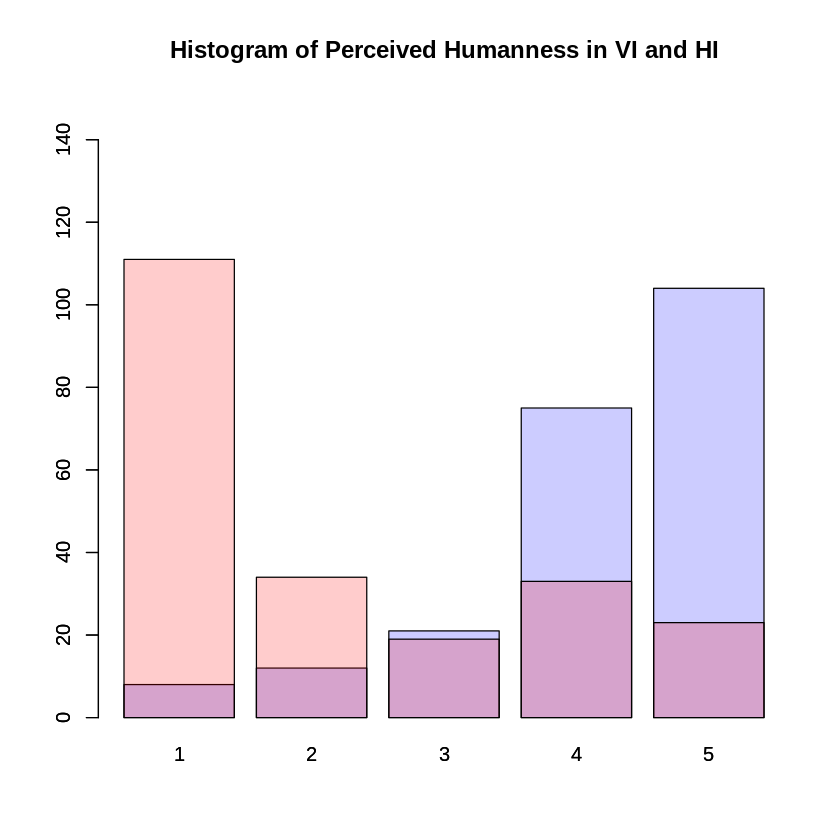

In [49]:
barplot(table(beh_dat[beh_dat$macrocondition == 'HI',]$human), col=rgb(0, 0, 1, 0.2), ylim=c(0,150), main='Histogram of Perceived Humanness in VI and HI')
barplot(table(beh_dat[beh_dat$macrocondition == 'VI',]$human), col=rgb(1, 0, 0, 0.2), add=TRUE)

png 
  2

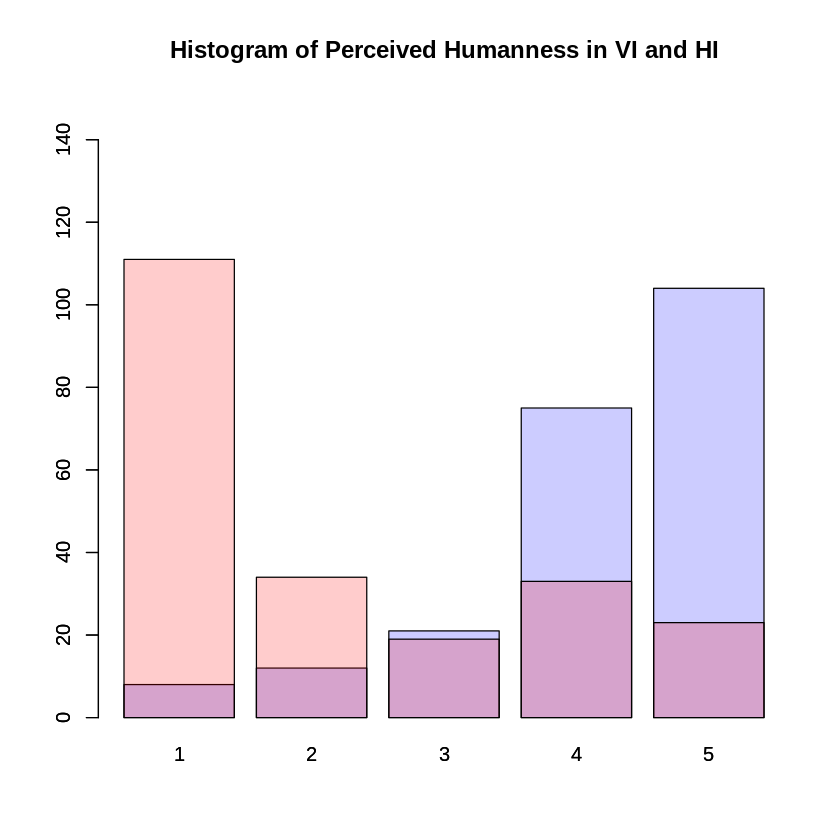

In [50]:
png("./Figures/Histogram_Human.png")
barplot(table(beh_dat[beh_dat$macrocondition == 'HI',]$human), col=rgb(0, 0, 1, 0.2), ylim=c(0,150), main='Histogram of Perceived Humanness in VI and HI')
barplot(table(beh_dat[beh_dat$macrocondition == 'VI',]$human), col=rgb(1, 0, 0, 0.2), add=TRUE)
dev.off()

barplot(table(beh_dat[beh_dat$macrocondition == 'HI',]$human), col=rgb(0, 0, 1, 0.2), ylim=c(0,150), main='Histogram of Perceived Humanness in VI and HI')
barplot(table(beh_dat[beh_dat$macrocondition == 'VI',]$human), col=rgb(1, 0, 0, 0.2), add=TRUE)

png 
  2

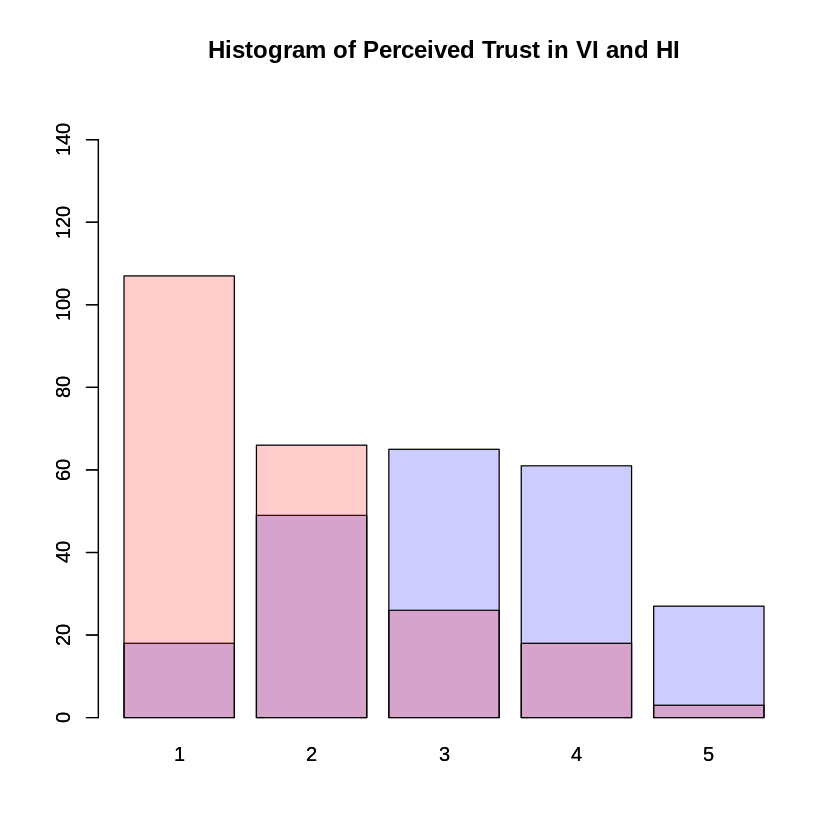

In [51]:
png("./Figures/Histogram_Trust.png")
barplot(table(beh_dat[beh_dat$macrocondition == 'HI',]$trust), col=rgb(0, 0, 1, 0.2), ylim=c(0,150), main='Histogram of Perceived Trust in VI and HI')
barplot(table(beh_dat[beh_dat$macrocondition == 'VI',]$trust), col=rgb(1, 0, 0, 0.2), add=TRUE)
dev.off()

barplot(table(beh_dat[beh_dat$macrocondition == 'HI',]$trust), col=rgb(0, 0, 1, 0.2), ylim=c(0,150), main='Histogram of Perceived Trust in VI and HI')
barplot(table(beh_dat[beh_dat$macrocondition == 'VI',]$trust), col=rgb(1, 0, 0, 0.2), add=TRUE)

png 
  2

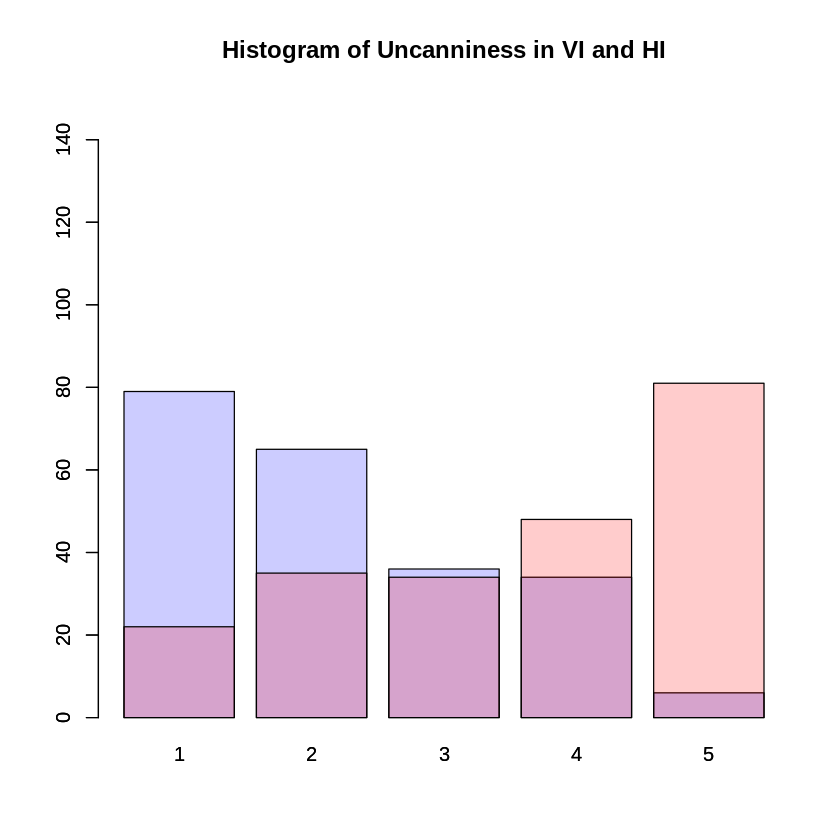

In [52]:
png("./Figures/Histogram_Uncanny.png")
barplot(table(beh_dat[beh_dat$macrocondition == 'HI',]$uncanny), col=rgb(0, 0, 1, 0.2), ylim=c(0,150), main='Histogram of Uncanniness in VI and HI')
barplot(table(beh_dat[beh_dat$macrocondition == 'VI',]$uncanny), col=rgb(1, 0, 0, 0.2), add=TRUE)
dev.off()

barplot(table(beh_dat[beh_dat$macrocondition == 'HI',]$uncanny), col=rgb(0, 0, 1, 0.2), ylim=c(0,150), main='Histogram of Uncanniness in VI and HI')
barplot(table(beh_dat[beh_dat$macrocondition == 'VI',]$uncanny), col=rgb(1, 0, 0, 0.2), add=TRUE)

png 
  2

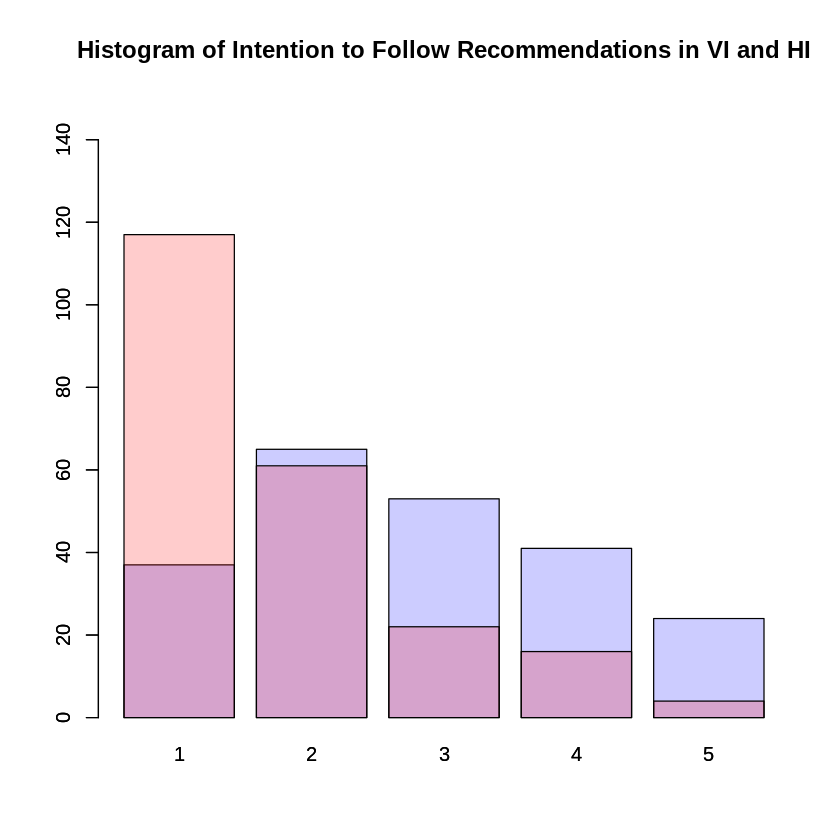

In [53]:
png("./Figures/Histogram_Use.png")
barplot(table(beh_dat[beh_dat$macrocondition == 'HI',]$use), col=rgb(0, 0, 1, 0.2), ylim=c(0,150), main='Histogram of Intention to Follow Recommendations in VI and HI')
barplot(table(beh_dat[beh_dat$macrocondition == 'VI',]$use), col=rgb(1, 0, 0, 0.2), add=TRUE)
dev.off()

barplot(table(beh_dat[beh_dat$macrocondition == 'HI',]$use), col=rgb(0, 0, 1, 0.2), ylim=c(0,150), main='Histogram of Intention to Follow Recommendations in VI and HI')
barplot(table(beh_dat[beh_dat$macrocondition == 'VI',]$use), col=rgb(1, 0, 0, 0.2), add=TRUE)

In [54]:
library("Hmisc")

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Warning message:
“package ‘Formula’ was built under R version 4.0.5”

Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:plyr’:

    is.discrete, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [55]:
myvars <- c("human", "trust", "uncanny", "use")
newdata <- beh_dat[myvars]

In [56]:
res <- cor(newdata)
res

,human,trust,uncanny,use
human,1.00000,0.68648,-0.68769,0.59833
trust,0.68648,1.00000,-0.58814,0.71313
uncanny,-0.68769,-0.58814,1.00000,-0.53284
use,0.59833,0.71313,-0.53284,1.00000


In [57]:
newdata.rcorr = rcorr(as.matrix(newdata))
newdata.rcorr

        human trust uncanny   use
human    1.00  0.69   -0.69  0.60
trust    0.69  1.00   -0.59  0.71
uncanny -0.69 -0.59    1.00 -0.53
use      0.60  0.71   -0.53  1.00

n= 440 


P
        human trust uncanny use
human          0     0       0 
trust    0           0       0 
uncanny  0     0             0 
use      0     0     0         

In [58]:
install.packages("corrplot") 
library(corrplot)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

corrplot 0.92 loaded



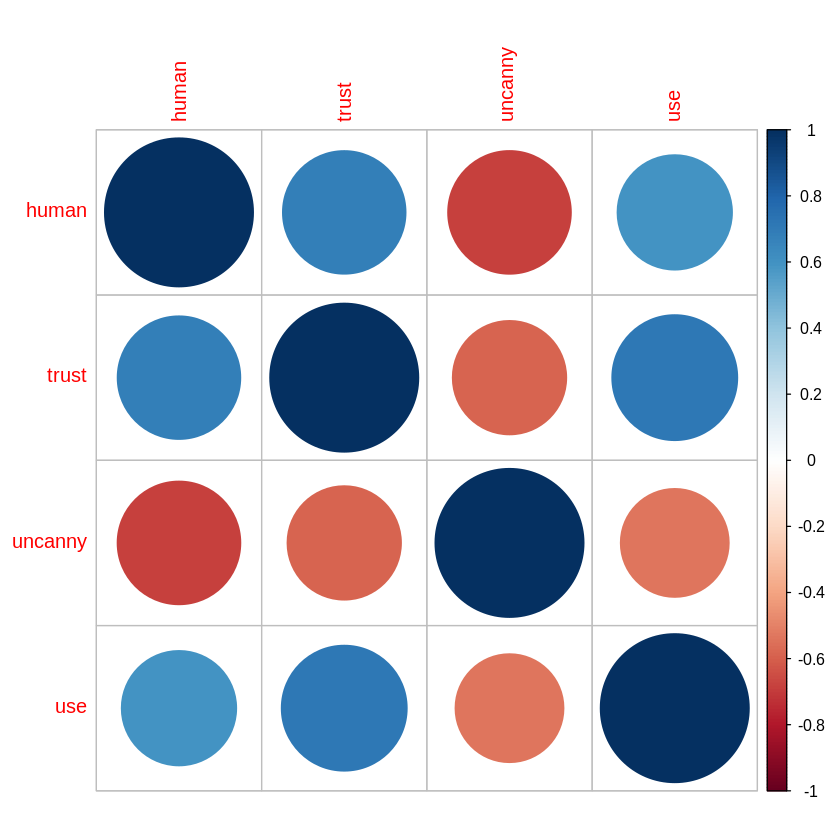

In [59]:
corrplot(res)